### Income data for 1965 and 2015 in China and USA.

<br>

#### General setup.
___

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

from IPython import display
from ipywidgets import interact, widgets

import re
import mailbox
import csv

%matplotlib inline

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

<br>

#### Load the data sets.
___

In [3]:
china1965 = pd.read_csv('../Data/income-1965-china.csv')
china2015 = pd.read_csv('../Data/income-2015-china.csv')
usa1965 = pd.read_csv('../Data/income-1965-usa.csv')
usa2015 = pd.read_csv('../Data/income-2015-usa.csv')

In [4]:
china1965.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   income        1000 non-null   float64
 1   log10_income  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [5]:
china1965.head()

,income,log10_income
0,1.026259,0.011257
1,0.912053,-0.039980
2,0.110699,-0.955857
3,0.469659,-0.328217
4,0.374626,-0.426402


There are two columns here, both representing income data. The second column represents base 10 logarithmic income (because the daily income and quality of life have logarithmic relationship, for example if you earn 16 dollars a day you need to go to 64 dollars a day before your quality of life changes). 

<br>

#### Stats.
___

In [6]:
# Max and min
china1965.min(), china1965.max()

(income          0.041968
 log10_income   -1.377078
 dtype: float64,
 income          5.426802
 log10_income    0.734544
 dtype: float64)

In [7]:
# Mean
china1965.mean()

income          0.660597
log10_income   -0.274157
dtype: float64

In [8]:
# Variance
china1965.var(ddof=0)

income          0.208846
log10_income    0.088610
dtype: float64

In [9]:
# Quantile for 25% and 75%
china1965.quantile([.25,.75])

,income,log10_income
0.25,0.344130,-0.463277
0.75,0.863695,-0.063640


In China in 1965 25% is less than 34 cents a day and 25% is more than 86 cents a day.

In [10]:
# Quantile for 50% is the same as meadian
china1965.quantile(.5), china1965.median()

(income          0.557477
 log10_income   -0.253773
 Name: 0.5, dtype: float64,
 income          0.557477
 log10_income   -0.253773
 dtype: float64)

In [11]:
scipy.stats.percentileofscore(china1965.income, 1.5)

95.5

This means that 95.5% of the income data lies before 1.5 dollars a day.

In [12]:
china1965.describe()

,income,log10_income
count,1000.000000,1000.000000
mean,0.660597,-0.274157
std,0.457226,0.297822
min,0.041968,-1.377078
25%,0.344130,-0.463277
50%,0.557477,-0.253773
75%,0.863695,-0.063640
max,5.426802,0.734544


In [13]:
usa1965.describe()

,income,log10_income
count,1000.000000,1000.000000
mean,31.587965,1.418835
std,22.101531,0.262200
min,4.177852,0.620953
25%,17.498592,1.243003
50%,26.069531,1.416133
75%,39.017113,1.591255
max,246.030397,2.390989


From the above stats we can see that in 1965 in China the income was almost 50% lower than in USA.

<br>

#### Plotting.
___

1. Boxplot


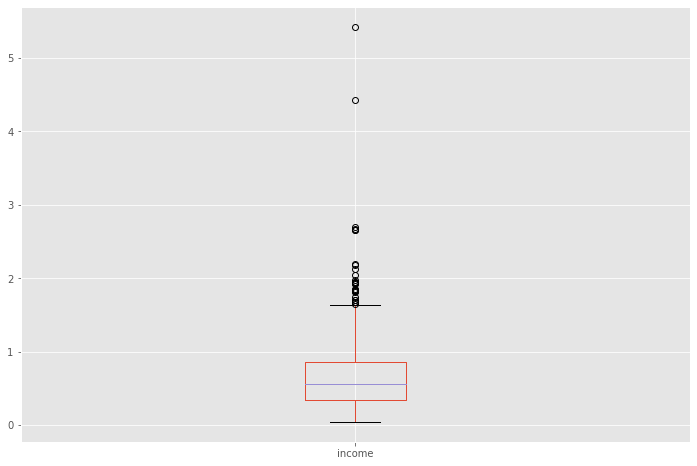

In [14]:
china1965.income.plot(kind='box');

Boxplot visualize coverage intervals. It reveals data from 25th to 75th quantiles where the purple line is a median. Whiskers are set 150% and 66% respectively of the quantiles. Points below and above the whiskers are considered fliers so may not be typical (or even be outliers and reflect measurement errors).

Let's compare China and USA with a boxplot.

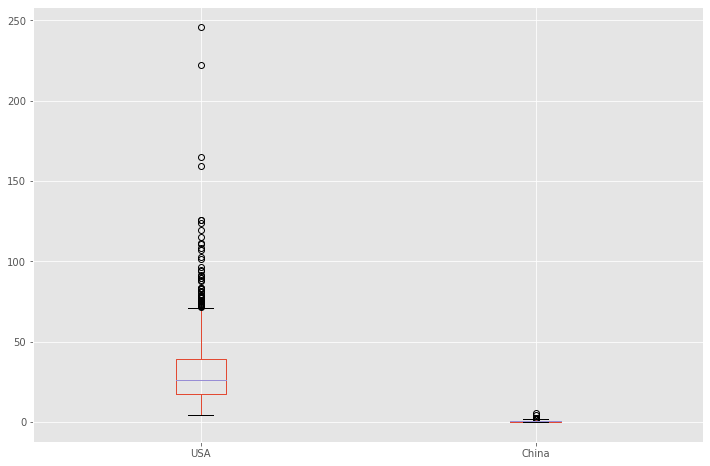

In [15]:
pd.DataFrame({'USA': usa1965.income, 'China': china1965.income}).boxplot();

Since the scale is too different we can use logarithm of the income data instead.

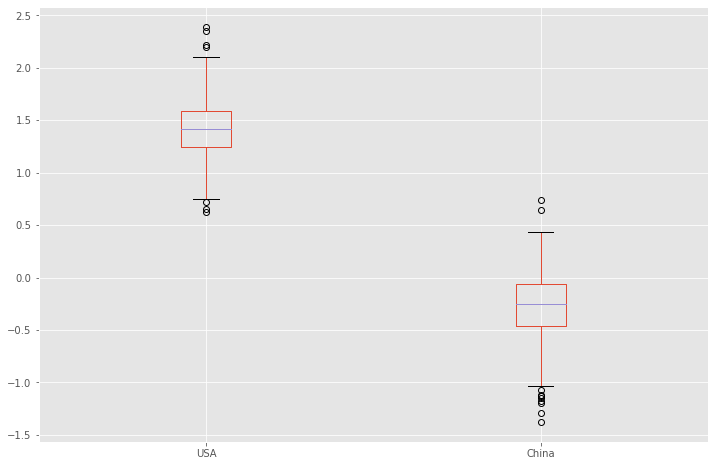

In [16]:
pd.DataFrame({'USA': usa1965.log10_income, 'China': china1965.log10_income}).boxplot();

<br>

2. Histograms.

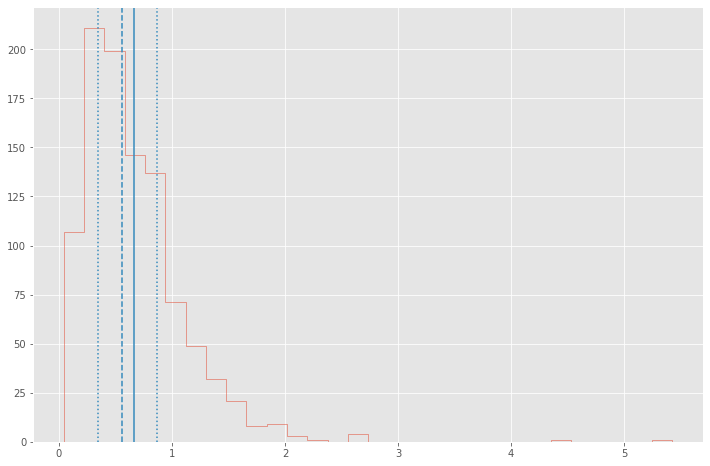

In [17]:
china1965.income.hist(histtype='step', bins=30)
plt.axvline(china1965.income.mean(), c='C1')
plt.axvline(china1965.income.median(), c='C1', linestyle='--')
plt.axvline(china1965.income.quantile(0.25), c='C1', linestyle=':')
plt.axvline(china1965.income.quantile(0.75), c='C1', linestyle=':');

Here we can see that the most common salary is around 0.5 dollar. 

<br>

3. Density plot 

It is just an approximation (since we don't have access to the entire distribution) that depends on the scale of the bandwidth.

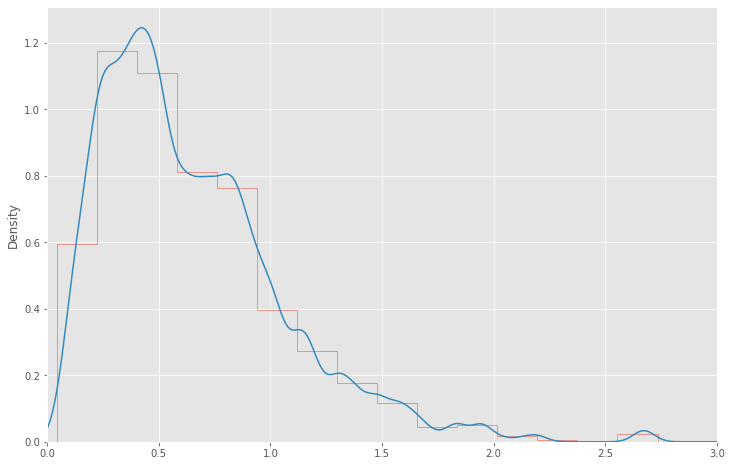

In [18]:
# Normalize the histogram
china1965.income.hist(histtype='step', bins=30, density = True)
china1965.income.plot.density(bw_method=0.1)

plt.axis(xmin=0, xmax=3);

Let's compare China and USA with histograms for 1965 and 2015.

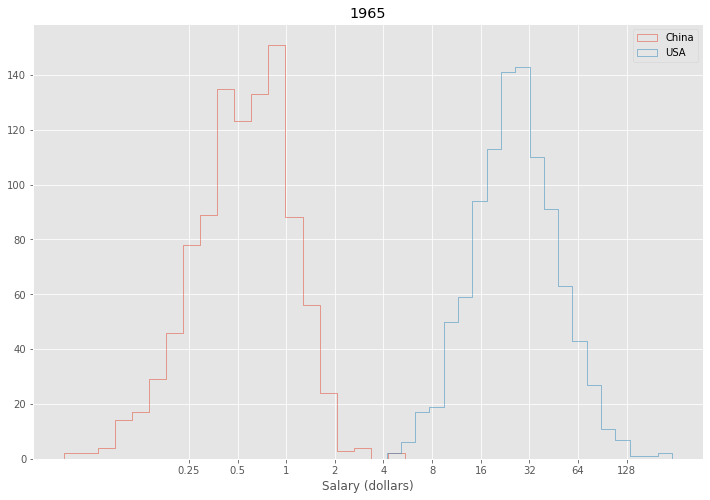

In [19]:
china1965.log10_income.hist(histtype='step', bins=20, label='China')
usa1965.log10_income.hist(histtype='step', bins=20, label='USA')

levels = [.25, .5, 1, 2, 4, 8, 16, 32, 64, 128]
plt.xticks(np.log10(levels), levels)
plt.xlabel('Salary (dollars)')
plt.title('1965')
plt.legend();

Here we observe no overlapping where the poorest americans are richer than the richest chinese.

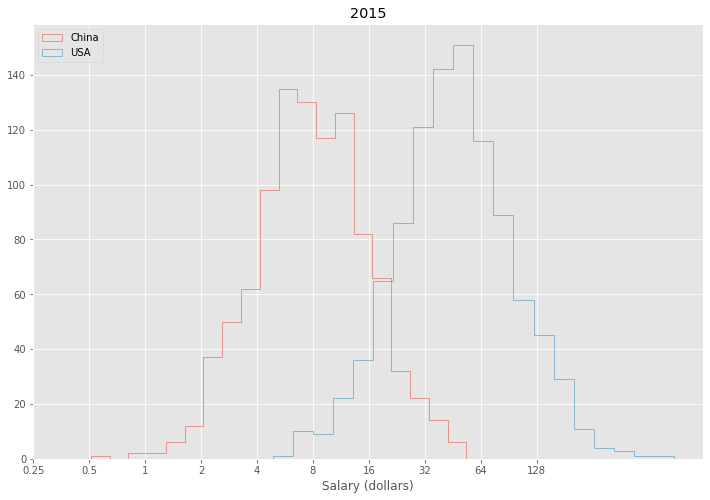

In [20]:
china2015.log10_income.hist(histtype='step', bins=20, label='China')
usa2015.log10_income.hist(histtype='step', bins=20, label='USA')

levels = [.25, .5, 1, 2, 4, 8, 16, 32, 64, 128]
plt.xticks(np.log10(levels), levels)
plt.xlabel('Salary (dollars)')
plt.title('2015')
plt.legend();

The graph depicts the overlap between the histograms. It is clear that both chinese and americans became richer since 1965.

<br>

4. Scaled histgrams.

To show relative size of population. 

In [21]:
# Select population of USA and China for 2015
gapminder = pd.read_csv('../data/gapminder.csv')
china_pop2015 = float(gapminder.query('country == "China" and year == 2015').population)
usa_pop2015 = float(gapminder.query('country == "United States" and year == 2015').population)

In [22]:
china_pop2015, usa_pop2015

(1376048943.0, 321773631.0)

Create a weighted data set where weight is population divided by number of entries.

In [23]:
china2015['weight'] = china_pop2015 / len(china2015)
usa2015['weight'] = usa_pop2015 / len(usa2015)

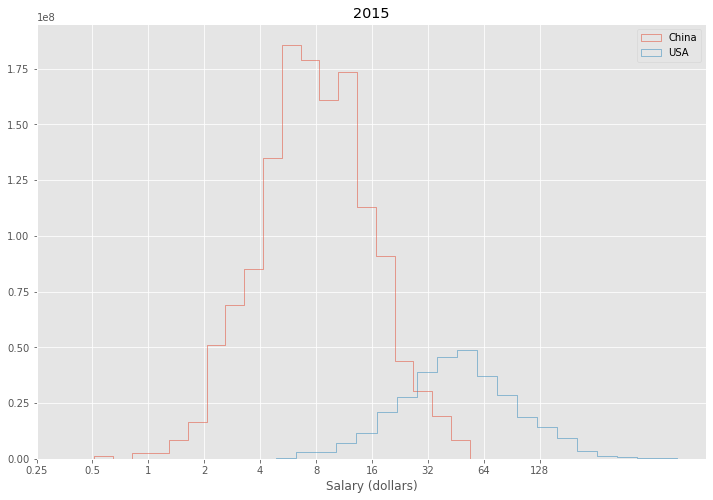

In [24]:
china2015.log10_income.hist(histtype='step', bins=20, weights=china2015.weight, label='China')
usa2015.log10_income.hist(histtype='step', bins=20, weights=usa2015.weight, label='USA')

levels = [.25, .5, 1, 2, 4, 8, 16, 32, 64, 128]
plt.xticks(np.log10(levels), levels)
plt.xlabel('Salary (dollars)')
plt.title('2015')
plt.legend();

<br>

___
#### End.